# HIT-UAV: A High-altitude Infrared Thermal Dataset for Unmanned Aerial Vehicles

Follow this notebook to prepare HITUAV

**Description**
- The HIT-UAV contains 2898 infrared thermal images extracted from 43470 frames, captured by UAV from different scenes (schools, parking lots, roads, playgrounds, etc.), covering a wide range of aspects including objects (Person, Bicycle, Car, OtherVehicle), flight altitude data (from 60 to 130 meters), camera perspective data (from 30 to 90 degrees), and daylight intensity (day and night).

**Annotations**
- annotations are stored in two ways: single .json file for each subset or in .xml files (one per photo)
- dataset provides two bounding box types: oriented and standard (which will be used)
- bounding boxes in xywh format

**Table of content:**

0. Init - imports and data download
1. Data transformation
2. Dataset visualization

This dataset can be downloaded from [github](https://github.com/suojiashun/HIT-UAV-Infrared-Thermal-Dataset). Given the requirements of this project we will end up using only parts of the dataset such as photos with humans and only part of data with standard bounding boxes. Files that will be used during data processing are as follows:
 - train set annotations stored in JSON file `HIT-UAV-Infrared-Thermal-Dataset-main/normal_json/annotations/train.json`
 - test set annotations stored in JSON file `HIT-UAV-Infrared-Thermal-Dataset-main/normal_json/annotations/test.json`
 - validation set annotations stored in JSON file `HIT-UAV-Infrared-Thermal-Dataset-main/normal_json/annotations/val.json`
 - train set photos stored in directory `HIT-UAV-Infrared-Thermal-Dataset-main/normal_json/train`
 - test set photos stored in directory `HIT-UAV-Infrared-Thermal-Dataset-main/normal_json/test`
 - validation set photos stored in directory `HIT-UAV-Infrared-Thermal-Dataset-main/normal_json/val`

after unpacking the .zip archive (downloaded from provided github page) directories and files in main directory should have given overall structure (as per day 01.11.2022)
```
HIT-UAV-Infrared-Thermal-Dataset-main
├───0_readme_images
├───normal_json
├───normal_xml
├───rotate_json
├───rotate_xml
├───.DS_Store
├───LICENCE
└───README
```

In further processing we will be using only files and directories mentioned earlier. To process the files it is recommended to arrange them in project directory according to the schema shown below

```
data
└───source
    └───HIT-UAV-Infrared-Thermal-Dataset-main
        └───normal_json
            ├───annotations
            │   ├───test.json
            │   ├───train.json
            │   └───val.json
            ├───test
            ├───train
            └───val

```

In [15]:
# Uncomment below two lines to reload imported packages (in case of modifying them)
%load_ext autoreload
%autoreload 2

from prj_utils.consts import ROOT_DIR
import os
import random
from random import sample
from data_processing.HITUAV_dataset_processing import from_HITUAV_json_to_xywhn_yolo_format
from data_processing.HITUAV_dataset_processing import copy_HITUAV_images_to_given_dir
from data_processing.image_processing import get_number_of_objects_stats
from data_processing.image_processing import plot_xywhn_annotated_image_from_file

TRAIN_DIR = f'{ROOT_DIR}/data/source/HIT-UAV-Infrared-Thermal-Dataset-main/normal_json/train'
TEST_DIR = f'{ROOT_DIR}/data/source/HIT-UAV-Infrared-Thermal-Dataset-main/normal_json/test'
VAL_DIR = f'{ROOT_DIR}/data/source/HIT-UAV-Infrared-Thermal-Dataset-main/normal_json/val'
ANNO_DIR = f'{ROOT_DIR}/data/source/HIT-UAV-Infrared-Thermal-Dataset-main/normal_json/annotations'

TRAIN_PROCESSED_DIR = f'{ROOT_DIR}/data/processed/HIT-UAV/train'
TEST_PROCESSED_DIR = f'{ROOT_DIR}/data/processed/HIT-UAV/test'
VAL_PROCESSED_DIR = f'{ROOT_DIR}/data/processed/HIT-UAV/validate'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Data transformation
- Convert data to YOLO format
- Image transformations

### 1.1 Convert annotations to YOLO format

Yolo format:
- One *.txt file per image (if no objects in image, no *.txt file is required).
- One row per object.
- Each row is `class x_center y_center scaled_width scaled_height` format, separated by space.
- Box coordinates must be in normalized from 0 to 1. If your boxes are in pixels, divide x_center and width by image width, and y_center and height by image height.
- Bounding box in annotation in xywhn format
- Class numbers are zero-indexed (start from 0).

More about yolo format data [here](https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data#11-create-datasetyaml).

In [8]:
from_HITUAV_json_to_xywhn_yolo_format(f'{ANNO_DIR}/train.json',f'{TRAIN_DIR}',f'{TRAIN_PROCESSED_DIR}/labels')
from_HITUAV_json_to_xywhn_yolo_format(f'{ANNO_DIR}/test.json',f'{TEST_DIR}',f'{TEST_PROCESSED_DIR}/labels')
from_HITUAV_json_to_xywhn_yolo_format(f'{ANNO_DIR}/val.json',f'{VAL_DIR}',f'{VAL_PROCESSED_DIR}/labels')

### 1.2 Image transformations
- Copy images with annotations from source directory to processed.

After this step processed data directory should look like this:

```
data
└───processed
    └───HIT-UAV-Infrared-Thermal-Dataset-main
        ├───test
        │   ├───images
        │   └───labels
        ├───train
        │   ├───images
        │   └───labels
        └───validate
            ├───images
            └───labels
```

In [9]:
copy_HITUAV_images_to_given_dir(f'{TRAIN_PROCESSED_DIR}/labels',f'{TRAIN_DIR}',f'{TRAIN_PROCESSED_DIR}/images')
copy_HITUAV_images_to_given_dir(f'{TEST_PROCESSED_DIR}/labels',f'{TEST_DIR}',f'{TEST_PROCESSED_DIR}/images')
copy_HITUAV_images_to_given_dir(f'{VAL_PROCESSED_DIR}/labels',f'{VAL_DIR}',f'{VAL_PROCESSED_DIR}/images')

## 2. Dataset visualization
- Dataset stats
- Data annotation visualization - example images

### 2.1 Dataset stats
Show stats by:
- number of objects in the images
- average lightness

array([[<AxesSubplot: title={'center': 'number of objects'}>]],
      dtype=object)

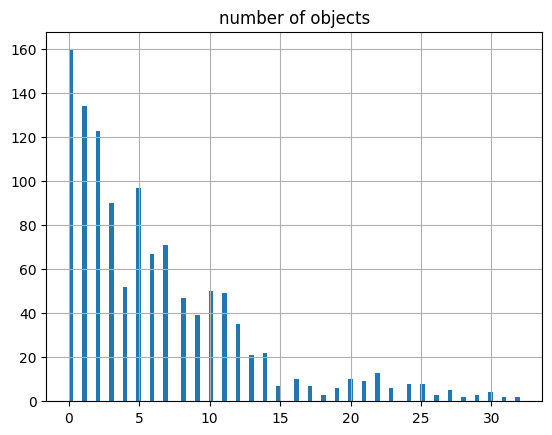

In [12]:
# By number of objects
max_people_limit = 100
number_of_people_stats = get_number_of_objects_stats(TRAIN_PROCESSED_DIR + '/labels/')
number_of_people_stats[number_of_people_stats['number of objects'] > max_people_limit] = max_people_limit
number_of_people_stats[number_of_people_stats['number of objects'] <= max_people_limit].hist(column='number of objects', bins=max_people_limit)


array([[<AxesSubplot: title={'center': 'avg brightness'}>]], dtype=object)

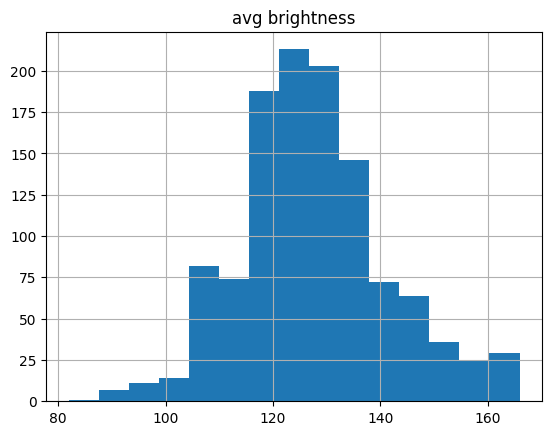

In [13]:
from data_processing.image_processing import get_brightness_stats

# By lightness
avg_lightness = get_brightness_stats(TRAIN_PROCESSED_DIR + '/images')
avg_lightness.hist(column='avg brightness', bins=15)

## 2.2 Example images

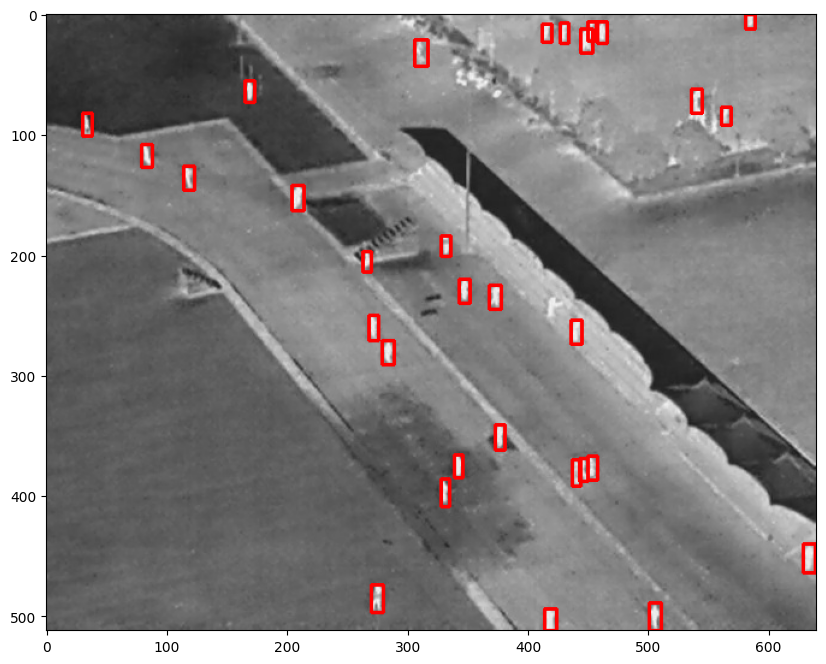

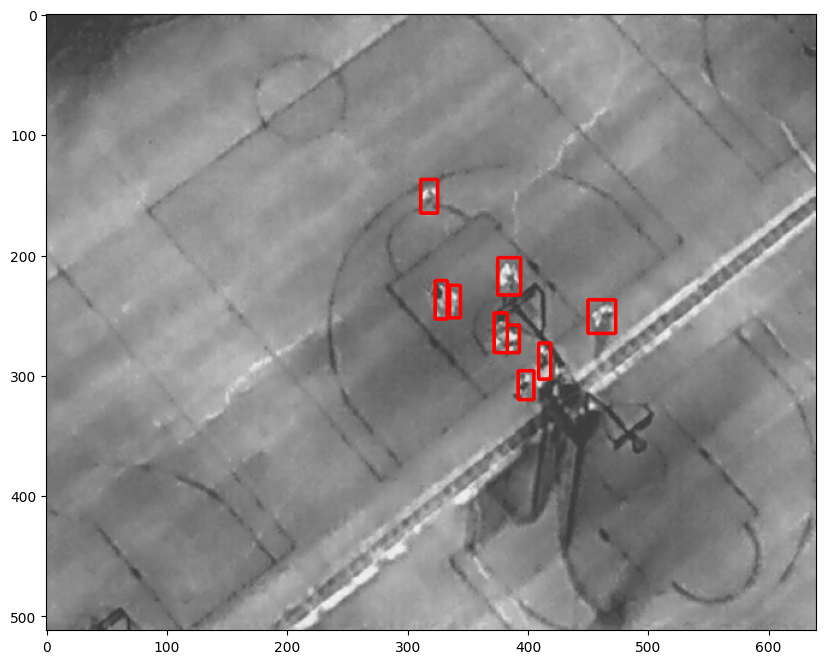

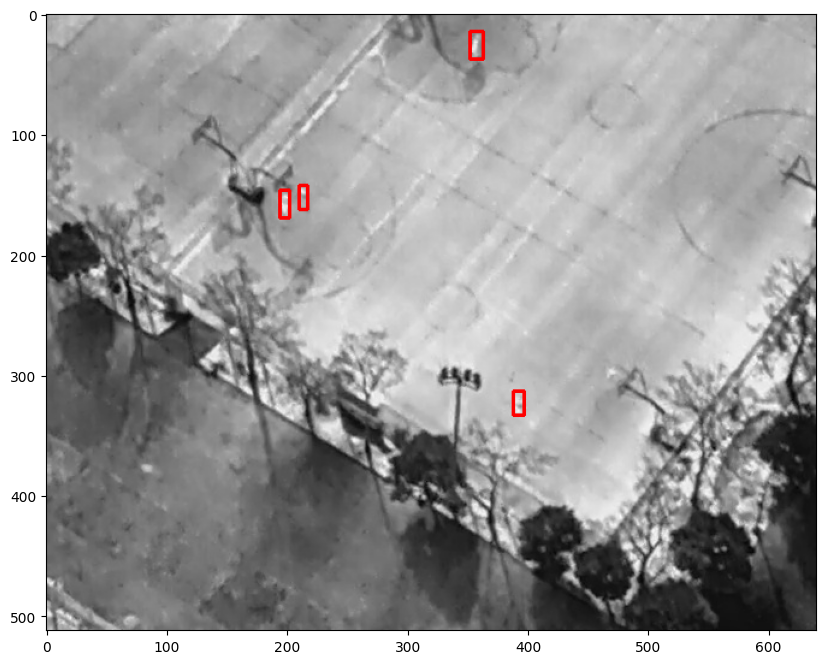

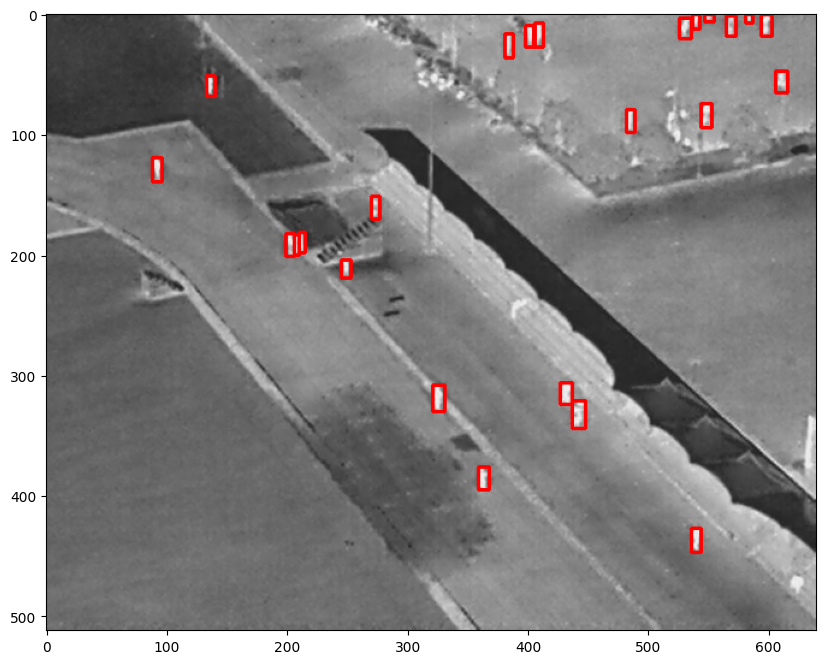

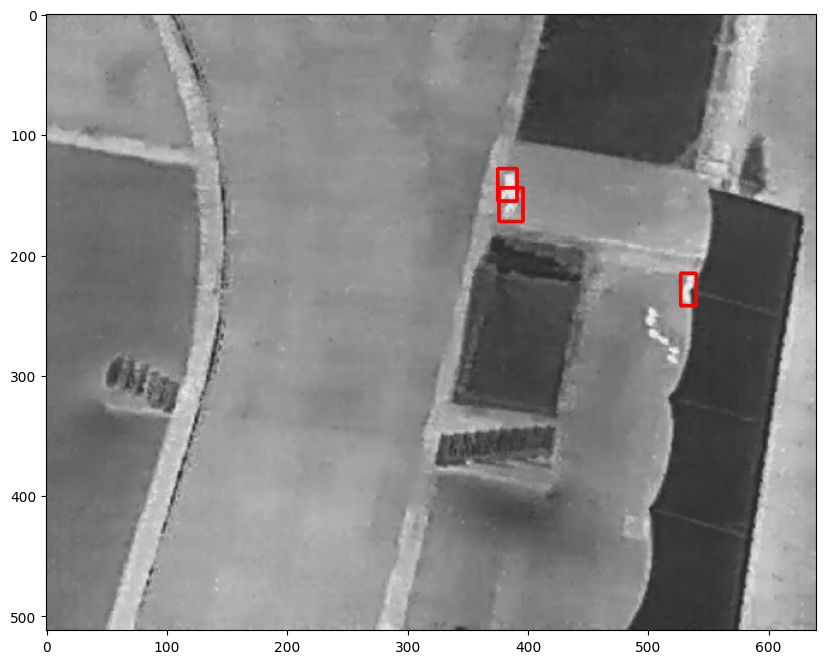

In [16]:
random.seed(23)
for filename in sample(os.listdir(f'{TRAIN_PROCESSED_DIR}/images'), 5):
    plot_xywhn_annotated_image_from_file(f'{TRAIN_PROCESSED_DIR}/images/{filename.split(".")[0]}.jpg',
                                         f'{TRAIN_PROCESSED_DIR}/labels/{filename.split(".")[0]}.txt')
